<a href="https://colab.research.google.com/github/GRUPPE-BINA24/Datenspeicher/blob/main/BINA_CaseStudy_Wohnungsmarkt_Schweiz_Bernhardsgr%C3%BCtter_Galliker_Moos_Pauger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse der Wohnungsmärkte in der Schweiz (2012-2023)



---

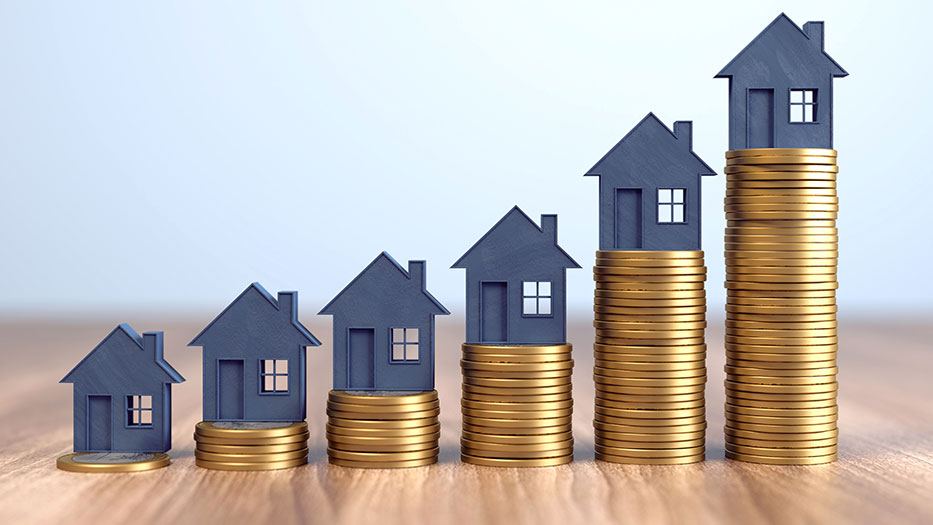

Quelle: AdobeStock | fotomek

##1) Ausgangslage
In diesem Jupyter Notebook untersuchen wir die Entwicklung der Wohnungsmieten und die Dynamik der Leerstände in der Schweiz über die letzten Jahrzehnte. Unser Fokus liegt auf der Zeitperiode von 2012 bis 2022 für die Mietpreise und von 1995 bis 2023 für die leerstehenden Wohnungen. Diese Analyse beinhaltet die Betrachtung regionaler Unterschiede, insbesondere auf Kantonsebene, und die Untersuchung möglicher Korrelationen zwischen den Mieten, den Leerständen und dem hypothekarischen Referenzzinssatz.


### Zielsetzungen

1. **Entwicklung der Mietpreise (2012-2022):** Untersuchung der Trends in den Wohnungsmieten auf nationaler und kantonaler Ebene. Identifikation von Regionen mit signifikanten Preissteigerungen oder -senkungen.
   
2. **Korrelation mit dem hypothekarischen Referenzzinssatz:** Analyse der Beziehung zwischen den Mietpreisen und dem hypothekarischen Referenzzinssatz, um potenzielle Einflüsse auf die Mietpreisentwicklung zu erkennen.

3. **Leerstehende Wohnungen (1995-2023):** Untersuchung der Entwicklung leerstehender Wohnungen in der Schweiz, inklusive regionaler Unterschiede. Identifikation von Trends und möglichen Ursachen für Veränderungen im Zeitverlauf.

4. **Zusammenhang zwischen Mieten und Leerständen:** Analyse der Beziehung zwischen den Wohnungsmieten und den Leerständen, um Einblicke in das Angebot-Nachfrage-Verhältnis auf dem Wohnungsmarkt zu gewinnen.

### Datenquellen

Die Analyse stützt sich auf mehrere Datenquellen:

- **Mietpreisdaten:** Diese Daten sollten Informationen zu den durchschnittlichen Mietpreisen pro Quadratmeter nach Kantonen und Jahren enthalten.
- **Leerstandsdaten:** Daten über die Anzahl leerstehender Wohnungen, ebenfalls aufgeschlüsselt nach Kantonen und Jahren.
- **Hypothekarischer Referenzzinssatz:** Historische Daten zum Referenzzinssatz, der für die Berechnung von Mietzinsanpassungen in der Schweiz verwendet wird.

### Methodik

1. **Datenbeschaffung und -bereinigung:** Importieren, Überprüfen und Bereinigen der Daten, um sie für die Analyse vorzubereiten.
   
2. **Explorative Datenanalyse (EDA):** Erste Untersuchung der Daten durch Visualisierungen und deskriptive Statistiken, um Trends und Muster zu identifizieren.
   
3. **Tiefere Analyse:**
   - **Mietpreise:** Anwendung statistischer Modelle, um die Entwicklung der Mietpreise zu verstehen und kantonale Unterschiede hervorzuheben.
   - **Leerstände:** Analyse der Leerstandsraten im zeitlichen Verlauf und nach Regionen.
   - **Korrelationsanalyse:** Einsatz von Korrelationskoeffizienten und möglicherweise multivariaten Analysen, um Beziehungen zwischen den Mietpreisen, den Leerständen und dem Referenzzinssatz zu untersuchen.

### Struktur des Notebooks

1. **Einleitung und Zielsetzung**
2. **Datenvorbereitung und -analyse**

  2a. **Entwicklung der Mietpreise (2012-2022)**

  2b. **Korrelation der Mietpreise mit dem hypothekarischen Referenzzinssatz**

  2c. **Entwicklung der leerstehenden Wohnungen (1995-2023)**

  2d. **Korrelation der Mietpreise mit den Leeständen**
3. **Zusammenfassung und Schlussfolgerungen**

### Erwartete Ergebnisse

- Ein umfassendes Bild der Entwicklungen auf dem Schweizer Wohnungsmarkt im untersuchten Zeitraum.
- Einblicke in die regionale Dynamik der Wohnungsmärkte.
- Verständnis der Einflüsse des hypothekarischen Referenzzinssatzes auf die Mietpreisentwicklung.
- Identifikation von Mustern, die die Entwicklung der Leerstände erklären könnten.



---

##2) Datenvorbereitung- und analyse

###2a) Entwicklung der Mietpreise (2012-2022)

**Beschreibung der Daten**:
Bei den Daten handelt es sich um die Mietpreisentwicklung für 3-Zimmerwohnungen in verschiedenen Schweizer Kantonen von 2012 bis 2022. Die Befragten gaben Auskunft zu ihrer Person, zum Haushalt, zu den Haushaltsmitgliedern sowie zur Wohnsituation. Die Beträge repräsentieren die monatlichen Netto-Mietzinsen (ohne Neben- und Heizkosten) der Mieter- und Genossenschafterwohnungen.

**Datenquelle**: [Bundesamt für Statistik](https://www.bfs.admin.ch/bfs/de/home/statistiken/kataloge-datenbanken.assetdetail.30885375.html)

**Einschränkungen der Daten**: Aufgrund methodischer Änderungen ab dem Jahr 2018 im Bereich der Erhebungsmethode, der Gewichtung sowie der Detektierung von Ausreissern können die Ergebnisse nur bedingt mit den Erhebungen vor 2018 verglichen werden. Ausserdem wurde der Fragebogen 2015 angepasst, weshalb die Ergebnisse nur bedingt mit den Erhebungen vor 2015 verglichen werden können.
Die Strukturerhebung umfasst Personen ab 15 Jahren, die in einem Privathaushalt der ständigen Wohnbevölkerung leben. Nicht berücksichtigt wurden Personen, die in Kollektivhaushalten leben, Diplomaten, internationale Funktionäre sowie deren Angehörige. Vereinzelte Ergebnisse in kleinen Kantonen basieren auf einer Extrapolation mit weniger als 50 Beobachtungen und erfordern eine besonders vorsichtige Interpretation.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_excel("https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx")
df.head()


,Kanton,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
0,Aargau,15.9,15.8,15.7,15.5,15.6,15.1,15.1,15.0,15.5,15.5,15.2
1,Appenzell A.Rh.,13.8,14.0,13.9,13.4,12.8,12.8,12.6,13.0,13.1,12.9,12.9
2,Appenzell I.Rh.,15.9,15.2,14.0,15.7,14.4,15.0,13.2,12.9,14.1,13.7,13.9
3,Basel-Landschaft,17.4,17.3,17.2,17.0,16.9,16.7,16.3,16.3,17.0,16.5,16.9
4,Basel-Stadt,18.2,18.0,17.7,17.7,17.4,16.8,16.9,16.4,16.8,16.7,16.6


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_excel("https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx")
df.describe()

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,15.368304,15.225446,14.968304,14.921964,14.654107,14.539911,14.386339,14.086429,14.829286,14.643661,14.447321
std,3.697131,3.622522,3.606820,3.653510,3.589234,3.511664,3.510361,3.487179,3.521176,3.467682,3.506649
min,0.012500,0.012500,0.012500,0.015000,0.015000,0.017500,0.017500,0.020000,0.020000,0.022500,0.025000
25%,14.150000,14.000000,14.000000,13.700000,13.475000,13.500000,13.375000,13.000000,13.875000,13.575000,13.300000
50%,15.500000,15.200000,14.750000,15.000000,14.600000,14.900000,14.250000,14.100000,15.100000,15.000000,14.500000
75%,17.400000,17.325000,16.900000,17.000000,16.600000,16.700000,16.375000,16.300000,16.800000,16.525000,16.600000
max,20.300000,19.700000,19.700000,20.100000,19.800000,19.500000,20.200000,19.500000,19.900000,19.100000,19.600000


####Verteilungen der Kantone (Scatterplots)

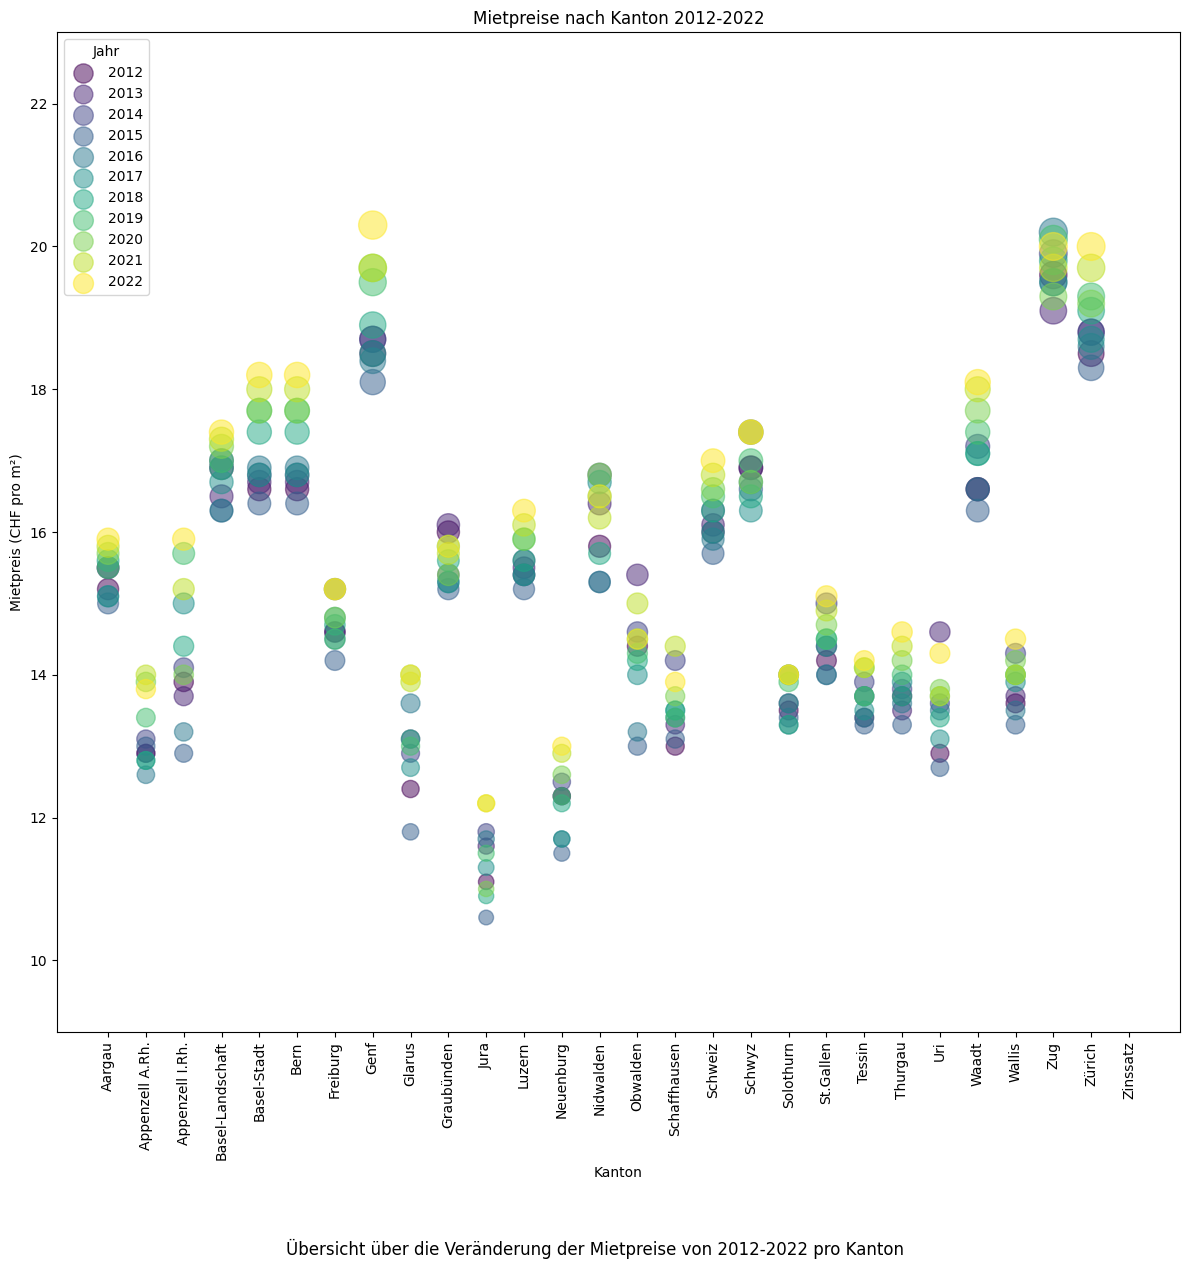

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # For color map

# Vorannahme: 'df' ist dein DataFrame

# Erstelle den Scatterplot
plt.figure(figsize=(12, 12), facecolor='white')  # Hintergrund der Figure transparent machen

# Erstelle eine Zuordnung der Kantone zu numerischen Indizes für den Jitter-Effekt
kanton_index = {k: idx for idx, k in enumerate(df['Kanton'].unique())}
colors = plt.cm.viridis(np.linspace(0, 1, 2023-2012))  # Generiere Farben für die verschiedenen Jahre

for i, Y in enumerate(range(2012, 2023)):
    # Korrigiere die Namen der Spalten
    spaltennamen = df.columns.tolist()
    korrigierte_spaltennamen = {str(spalte): spalte for spalte in spaltennamen}

    korrigierter_kanton_name = korrigierte_spaltennamen.get('Kanton', 'Kanton')
    korrigierter_jahr_name = korrigierte_spaltennamen.get(str(Y), next((name for name in korrigierte_spaltennamen if str(Y) in str(name)), None))


    # Berechne die Größen für die Scatterplot-Punkte basierend auf Mietpreis pro m²
    punktgroessen = df[korrigierter_jahr_name]  # Dies sollte eine Serie oder Liste von Werten sein, keine einzelne Variable

    # Füge die Daten des aktuellen Jahres zum Scatterplot hinzu
    plt.scatter(df[korrigierter_kanton_name], df[korrigierter_jahr_name], color=colors[i], s=punktgroessen*punktgroessen, alpha=0.5, label=str(Y))  # Verwende die Mietpreise als Punktgrößen und mache die Punkte transparent

# Fertigstellen des Plots
plt.title('Mietpreise nach Kanton 2012-2022')
plt.xlabel('Kanton')
plt.ylabel('Mietpreis (CHF pro m²)')
plt.xticks(rotation=90)

# Berechne neue Y-Achsen-Grenzen, um diese um 20% zu strecken
y_min, y_max = 11, 21  # Ursprüngliche Grenzen
y_range = y_max - y_min  # Berechne Bereich
y_stretch = y_range * 0.2  # Berechne Streckung
plt.ylim(y_min - y_stretch, y_max + y_stretch)  # Setze die neuen, gestreckten Grenzen

plt.legend(title='Jahr')
plt.tight_layout()

# Add a title below the graphic
plt.figtext(0.5, -0.05, 'Übersicht über die Veränderung der Mietpreise von 2012-2022 pro Kanton', ha='center', fontsize=12, color='black')

plt.show()


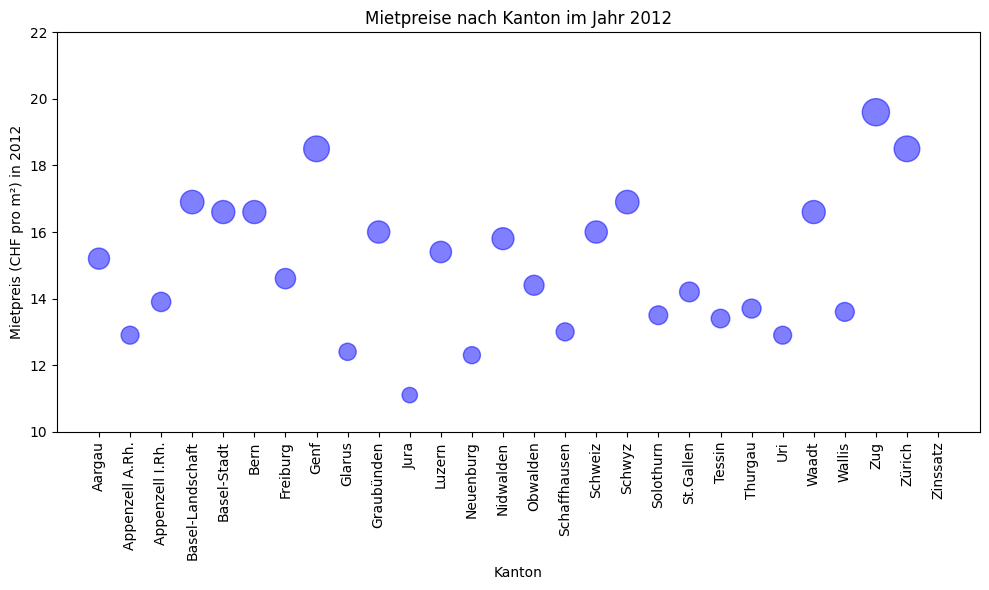

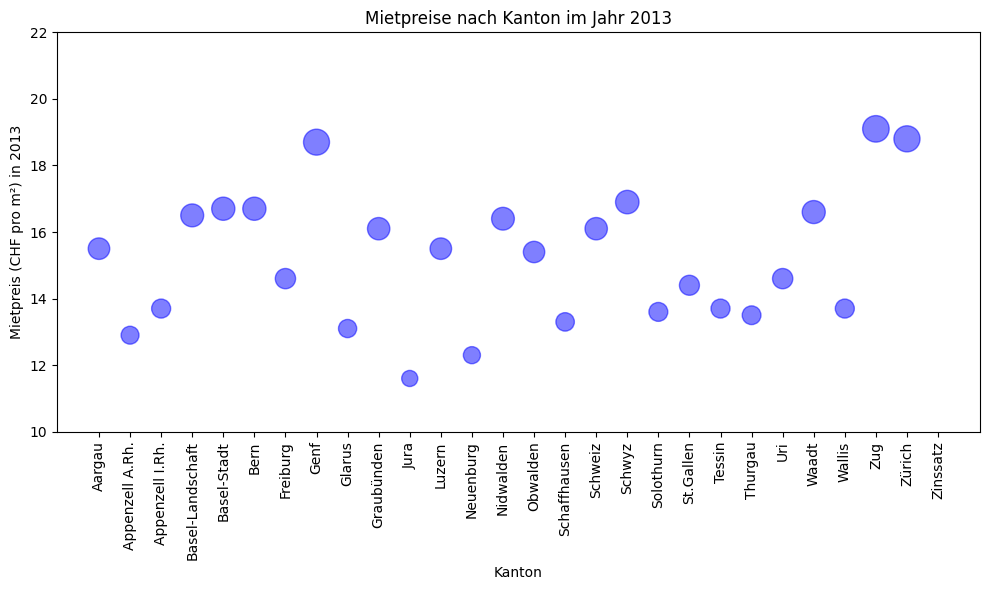

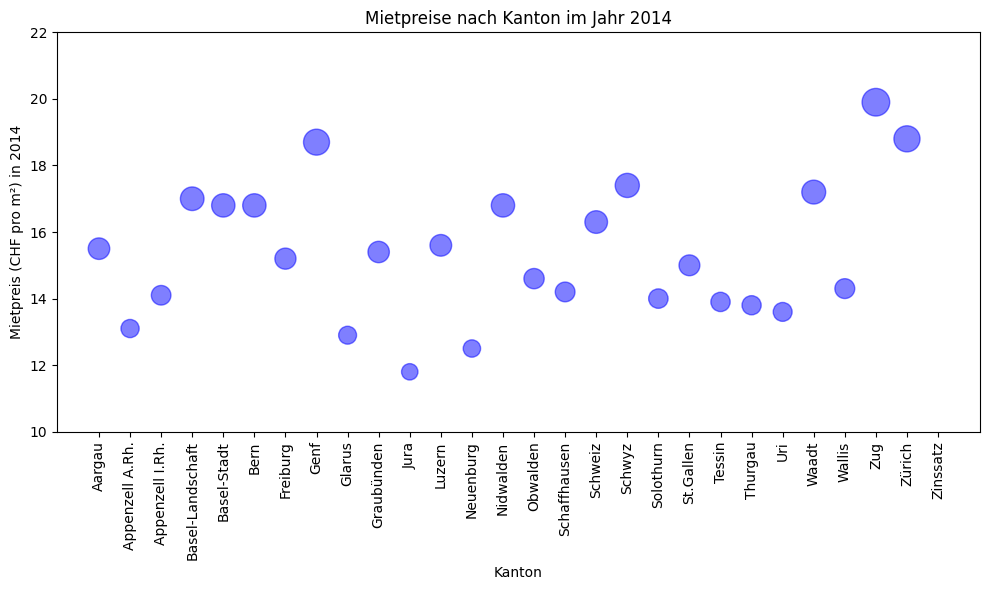

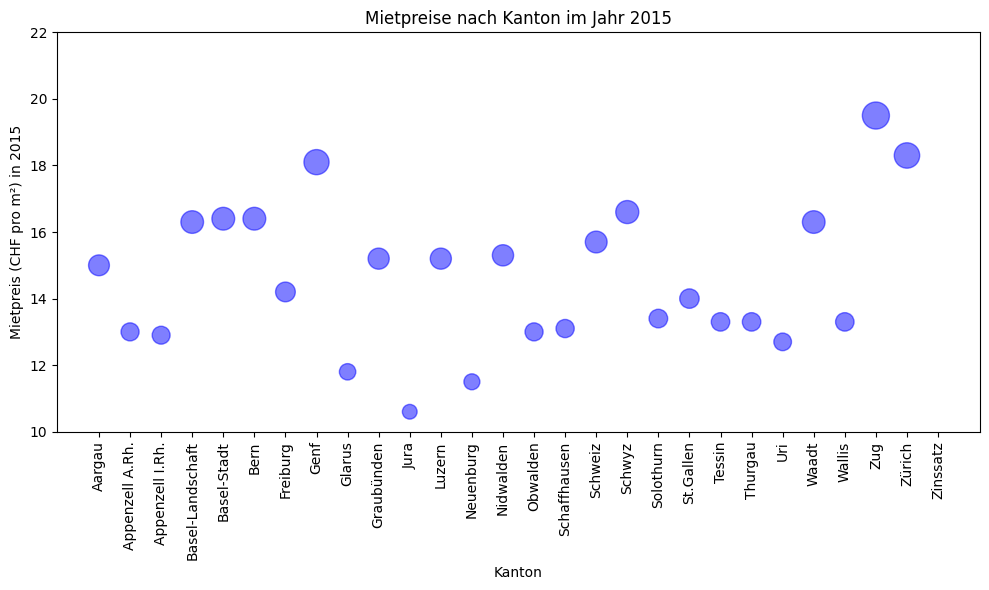

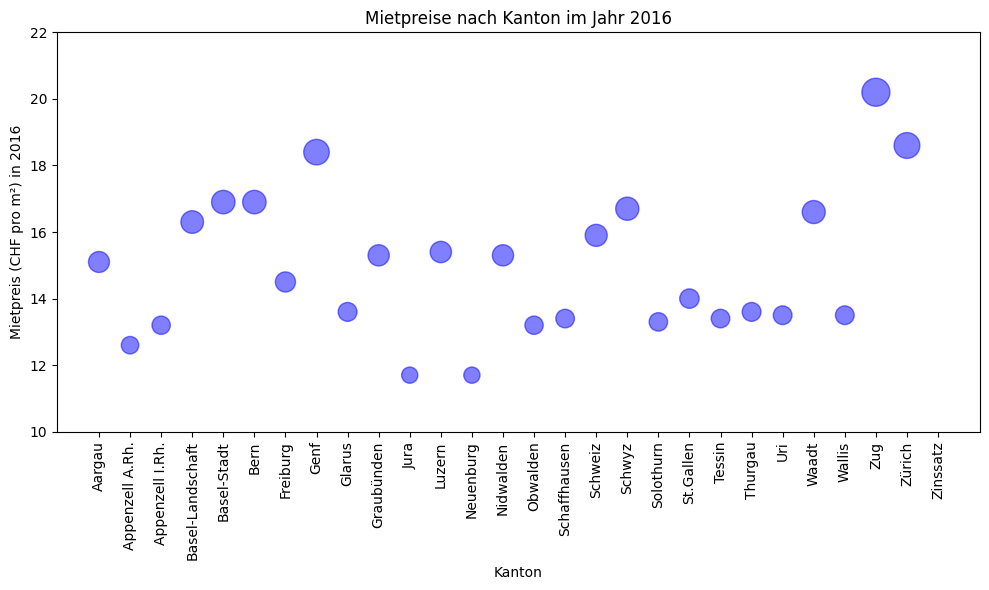

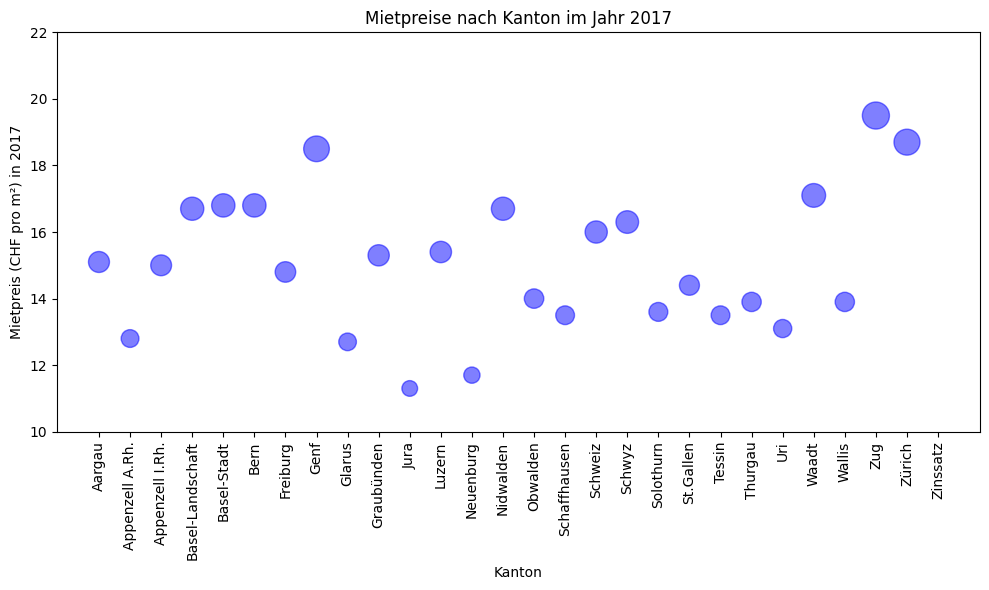

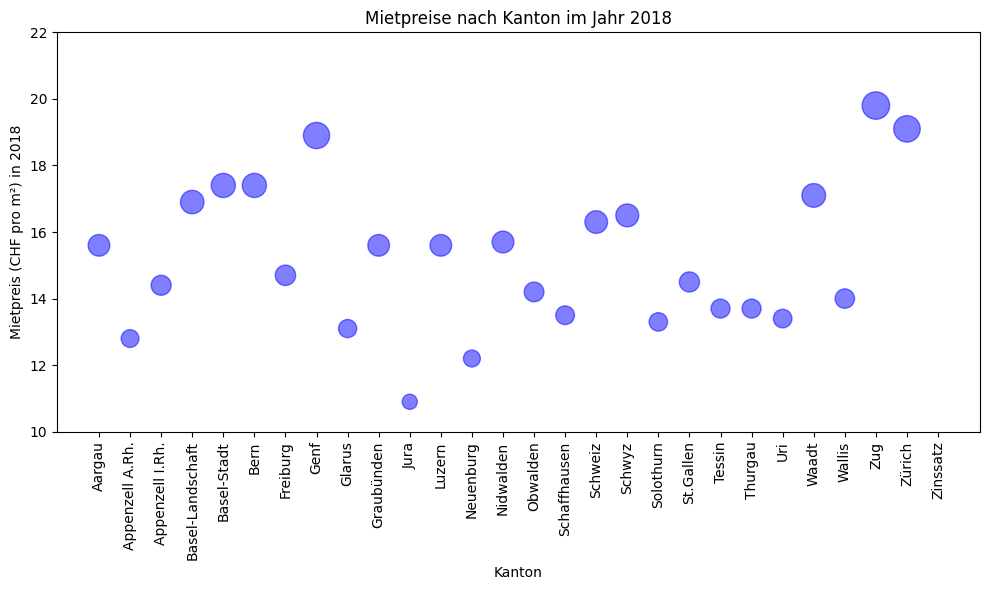

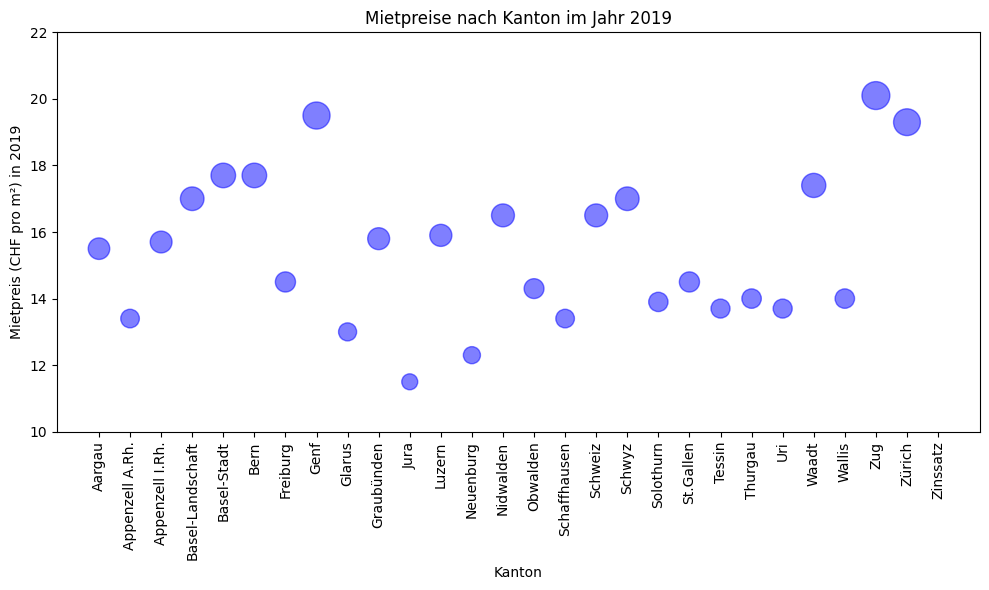

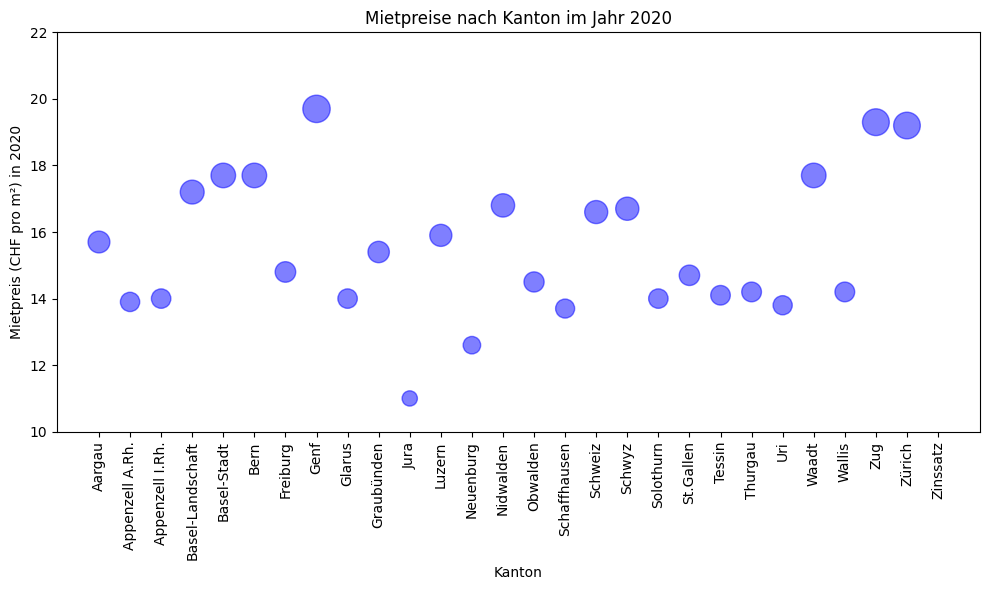

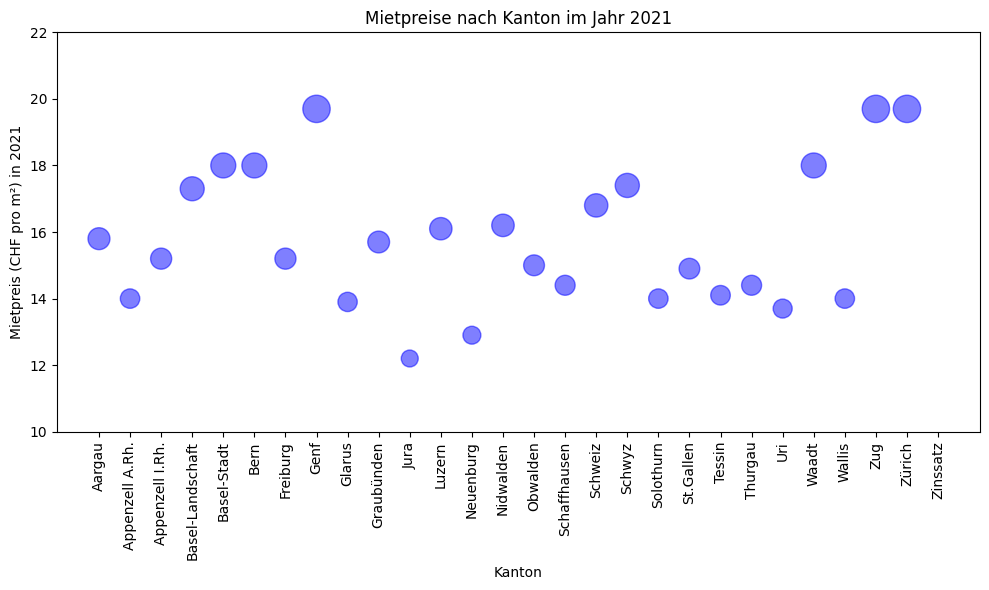

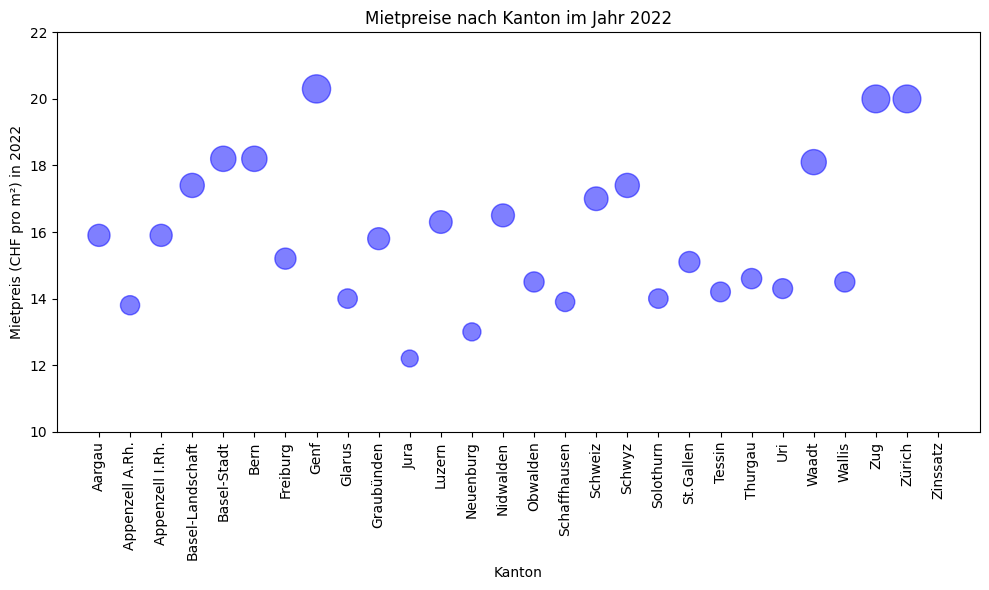

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Vorannahme: 'df' ist dein DataFrame

for Y in range(2012, 2023):
    # Korrigiere die Namen der Spalten
    spaltennamen = df.columns.tolist()
    korrigierte_spaltennamen = {str(spalte): spalte for spalte in spaltennamen}

    korrigierter_kanton_name = korrigierte_spaltennamen.get('Kanton', 'Kanton')
    korrigierter_jahr_name = korrigierte_spaltennamen.get(str(Y), next((name for name in korrigierte_spaltennamen if str(Y) in str(name)), None))

    # Berechne die Größen für die Scatterplot-Punkte basierend auf Mietpreis pro m²
    # Hier setzen wir die Punktgröße gleich dem Mietpreis pro m²
    punktgroessen = df[korrigierter_jahr_name]  # Dies sollte eine Serie oder Liste von Werten sein, keine einzelne Variable

    # Erstelle den Scatterplot
    plt.figure(figsize=(10, 6), facecolor='none')  # Hintergrund der Figure transparent machen
    plt.scatter(df[korrigierter_kanton_name], df[korrigierter_jahr_name], color='blue', s=punktgroessen*punktgroessen, alpha=0.5)  # Verwende die Mietpreise als Punktgrößen und mache die Punkte transparent
    plt.title(f'Mietpreise nach Kanton im Jahr {Y}')
    plt.xlabel(korrigierter_kanton_name)
    plt.ylabel(f'Mietpreis (CHF pro m²) in {korrigierter_jahr_name}')
    plt.xticks(rotation=90)
    plt.ylim(10, 22)  # Setze die Grenzen der Y-Achse fest
    plt.tight_layout()
    plt.show()


#### Jährliche Schwankungen pro Kanton (Liniendiagramme)

##### Vergleich alle Kantone vs. Gesamtschweiz

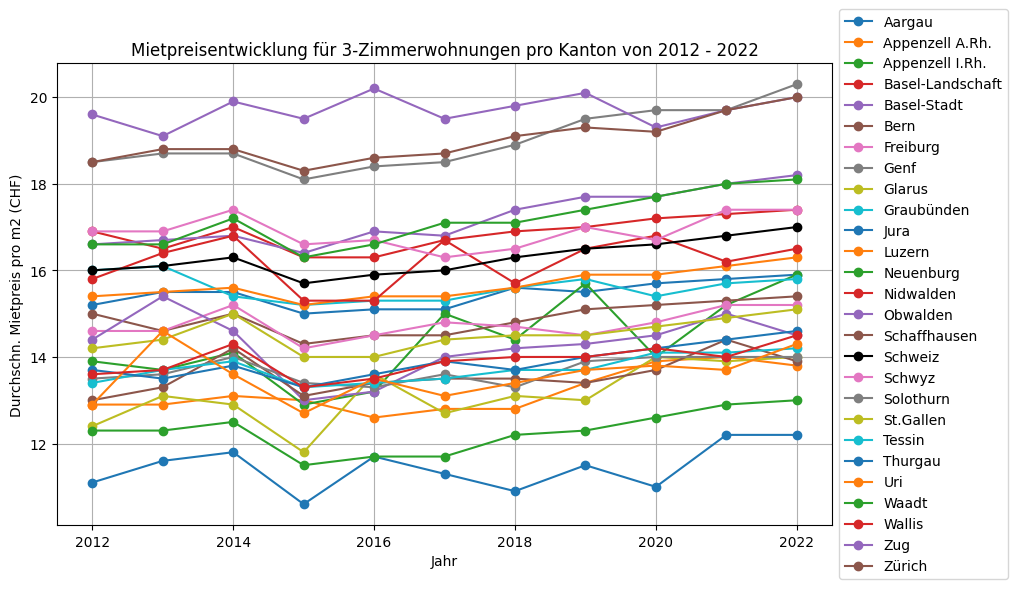

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten als DataFrame einlesen
data = {
"Kanton": ["Schweiz","Zürich","Bern","Luzern","Uri","Schwyz","Obwalden","Nidwalden","Glarus","Zug","Freiburg","Solothurn","Basel-Stadt","Basel-Landschaft","Schaffhausen","Appenzell A.Rh.","Appenzell I.Rh.","St.Gallen","Graubünden","Aargau","Thurgau","Tessin","Waadt","Wallis","Neuenburg","Genf","Jura"],
2022: [17 , 20 , 15.4 , 16.3 , 14.3 , 17.4 , 14.5 , 16.5 , 14 , 20 , 15.2 , 14 , 18.2 , 17.4 , 13.9 , 13.8 , 15.9 , 15.1 , 15.8 , 15.9 , 14.6 , 14.2 , 18.1 , 14.5 , 13 , 20.3 , 12.2],
2021: [16.8 , 19.7 , 15.3 , 16.1 , 13.7 , 17.4 , 15 , 16.2 , 13.9 , 19.7 , 15.2 , 14 , 18 , 17.3 , 14.4 , 14 , 15.2 , 14.9 , 15.7 , 15.8 , 14.4 , 14.1 , 18 , 14 , 12.9 , 19.7 , 12.2],
2020: [16.6 , 19.2 , 15.2 , 15.9 , 13.8 , 16.7 , 14.5 , 16.8 , 14 , 19.3 , 14.8 , 14 , 17.7 , 17.2 , 13.7 , 13.9 , 14 , 14.7 , 15.4 , 15.7 , 14.2 , 14.1 , 17.7 , 14.2 , 12.6 , 19.7 , 11],
2019: [16.5 , 19.3 , 15.1 , 15.9 , 13.7 , 17 , 14.3 , 16.5 , 13 , 20.1 , 14.5 , 13.9 , 17.7 , 17 , 13.4 , 13.4 , 15.7 , 14.5 ,15.8 , 15.5 , 14 , 13.7 , 17.4 , 14 , 12.3 , 19.5 , 11.5],
2018: [16.3 , 19.1 , 14.8 , 15.6 , 13.4 , 16.5 , 14.2 , 15.7 , 13.1 , 19.8 , 14.7 , 13.3 , 17.4 , 16.9 , 13.5 , 12.8 , 14.4 , 14.5 , 15.6 , 15.6 , 13.7 , 13.7 , 17.1 , 14 , 12.2 , 18.9 , 10.9],
2017: [16.0 , 18.7 , 14.5 , 15.4 , 13.1 , 16.3 , 14.0 , 16.7 , 12.7 , 19.5 , 14.8 , 13.6 , 16.8 , 16.7 , 13.5 , 12.8 ,  15.0  , 14.4 , 15.3 , 15.1 , 13.9 , 13.5 , 17.1 , 13.9 , 11.7 , 18.5 , 11.3],
2016: [15.9 , 18.6 , 14.5 , 15.4 , 13.5 , 16.7 , 13.2 , 15.3 , 13.6 , 20.2 , 14.5 , 13.3 , 16.9 , 16.3 , 13.4 , 12.6 ,  13.2  , 14.0 , 15.3 , 15.1 , 13.6 , 13.4 , 16.6 , 13.5 , 11.7 , 18.4 , 11.7],
2015: [15.7 , 18.3 , 14.3 , 15.2 , 12.7 , 16.6 , 13.0 , 15.3 , 11.8 , 19.5 , 14.2 , 13.4 , 16.4 , 16.3 , 13.1 , 13.0 ,  12.9  , 14.0 , 15.2 , 15.0 , 13.3 , 13.3 , 16.3 , 13.3 , 11.5 , 18.1 , 10.6],
2014: [16.3 , 18.8 , 15.0 , 15.6 , 13.6 , 17.4 , 14.6 , 16.8 , 12.9 , 19.9 , 15.2 , 14.0 , 16.8 , 17.0 , 14.2 , 13.1 ,  14.1  , 15.0 , 15.4 , 15.5 , 13.8 , 13.9 , 17.2 , 14.3 , 12.5 , 18.7 , 11.8],
2013: [16.1 , 18.8 , 14.6 , 15.5 , 14.6 , 16.9 , 15.4 , 16.4 , 13.1 , 19.1 , 14.6 , 13.6 , 16.7 , 16.5 , 13.3 , 12.9 ,  13.7  , 14.4 , 16.1 , 15.5 , 13.5 , 13.7 , 16.6 , 13.7 , 12.3 , 18.7 , 11.6],
2012: [16.0 , 18.5 , 15.0 , 15.4 , 12.9 , 16.9 , 14.4 , 15.8 , 12.4 , 19.6 , 14.6 , 13.5 , 16.6 , 16.9 , 13.0 , 12.9 ,  13.9  , 14.2 , 16.0 , 15.2 , 13.7 , 13.4 , 16.6 , 13.6 , 12.3 , 18.5 , 11.1]
}

# DataFrame erstellen
df = pd.DataFrame(data)

# Diagramm erstellen
plt.figure(figsize=(10, 6))

# Sortiere die Kantone alphabetisch für die Legende
sorted_df = df.sort_values(by='Kanton')

# Plot für jeden Kanton
for i in range(len(sorted_df)):
    if sorted_df.iloc[i, 0] == "Schweiz":
        plt.plot(df.columns[1:], sorted_df.iloc[i, 1:], marker='o', color='black', label=sorted_df.iloc[i, 0])
    else:
        plt.plot(df.columns[1:], sorted_df.iloc[i, 1:], marker='o', label=sorted_df.iloc[i, 0])

plt.title('Mietpreisentwicklung für 3-Zimmerwohnungen pro Kanton von 2012 - 2022')
plt.xlabel('Jahr')
plt.ylabel('Durchschn. Mietpreis pro m2 (CHF)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

**Beschreibung der Grafik und Auffälligkeiten**: Jeder Linie repräsentiert einen Kanton, wobei die Durchschnittsmietpreise pro Quadratmeter (in CHF) über die Jahre aufgetragen sind. Der Durchschnitt der Gesamtschweiz ist aufgrund der Sichbarkeit in schwarz abgebildet. Es fällt auf, dass einige teurere Kantone den Durchschnitt der Gesamtschweiz nach oben ziehen. Die Mehrheit der Kantone ist unter dem Durchschnitt der Gesamtschweiz. Um die Kantone besser vergleichen zu können werden in den nachfolgenden Grafiken die Top 5 der teuersten sowie der günstigen Kantone verglichen.

##### Top 5 teuerste Kantone vs. Gesamtschweiz

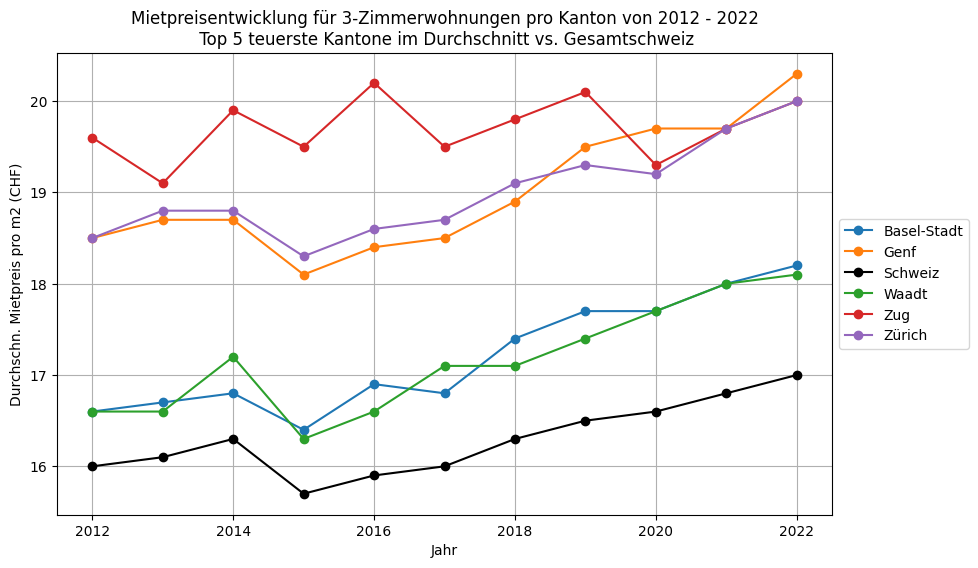

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten als DataFrame einlesen
data = {
"Kanton": ["Schweiz","Zürich","Bern","Luzern","Uri","Schwyz","Obwalden","Nidwalden","Glarus","Zug","Freiburg","Solothurn","Basel-Stadt","Basel-Landschaft","Schaffhausen","Appenzell A.Rh.","Appenzell I.Rh.","St.Gallen","Graubünden","Aargau","Thurgau","Tessin","Waadt","Wallis","Neuenburg","Genf","Jura"],
2022: [17 , 20 , 15.4 , 16.3 , 14.3 , 17.4 , 14.5 , 16.5 , 14 , 20 , 15.2 , 14 , 18.2 , 17.4 , 13.9 , 13.8 , 15.9 , 15.1 , 15.8 , 15.9 , 14.6 , 14.2 , 18.1 , 14.5 , 13 , 20.3 , 12.2],
2021: [16.8 , 19.7 , 15.3 , 16.1 , 13.7 , 17.4 , 15 , 16.2 , 13.9 , 19.7 , 15.2 , 14 , 18 , 17.3 , 14.4 , 14 , 15.2 , 14.9 , 15.7 , 15.8 , 14.4 , 14.1 , 18 , 14 , 12.9 , 19.7 , 12.2],
2020: [16.6 , 19.2 , 15.2 , 15.9 , 13.8 , 16.7 , 14.5 , 16.8 , 14 , 19.3 , 14.8 , 14 , 17.7 , 17.2 , 13.7 , 13.9 , 14 , 14.7 , 15.4 , 15.7 , 14.2 , 14.1 , 17.7 , 14.2 , 12.6 , 19.7 , 11],
2019: [16.5 , 19.3 , 15.1 , 15.9 , 13.7 , 17 , 14.3 , 16.5 , 13 , 20.1 , 14.5 , 13.9 , 17.7 , 17 , 13.4 , 13.4 , 15.7 , 14.5 ,15.8 , 15.5 , 14 , 13.7 , 17.4 , 14 , 12.3 , 19.5 , 11.5],
2018: [16.3 , 19.1 , 14.8 , 15.6 , 13.4 , 16.5 , 14.2 , 15.7 , 13.1 , 19.8 , 14.7 , 13.3 , 17.4 , 16.9 , 13.5 , 12.8 , 14.4 , 14.5 , 15.6 , 15.6 , 13.7 , 13.7 , 17.1 , 14 , 12.2 , 18.9 , 10.9],
2017: [16.0 , 18.7 , 14.5 , 15.4 , 13.1 , 16.3 , 14.0 , 16.7 , 12.7 , 19.5 , 14.8 , 13.6 , 16.8 , 16.7 , 13.5 , 12.8 ,  15.0  , 14.4 , 15.3 , 15.1 , 13.9 , 13.5 , 17.1 , 13.9 , 11.7 , 18.5 , 11.3],
2016: [15.9 , 18.6 , 14.5 , 15.4 , 13.5 , 16.7 , 13.2 , 15.3 , 13.6 , 20.2 , 14.5 , 13.3 , 16.9 , 16.3 , 13.4 , 12.6 ,  13.2  , 14.0 , 15.3 , 15.1 , 13.6 , 13.4 , 16.6 , 13.5 , 11.7 , 18.4 , 11.7],
2015: [15.7 , 18.3 , 14.3 , 15.2 , 12.7 , 16.6 , 13.0 , 15.3 , 11.8 , 19.5 , 14.2 , 13.4 , 16.4 , 16.3 , 13.1 , 13.0 ,  12.9  , 14.0 , 15.2 , 15.0 , 13.3 , 13.3 , 16.3 , 13.3 , 11.5 , 18.1 , 10.6],
2014: [16.3 , 18.8 , 15.0 , 15.6 , 13.6 , 17.4 , 14.6 , 16.8 , 12.9 , 19.9 , 15.2 , 14.0 , 16.8 , 17.0 , 14.2 , 13.1 ,  14.1  , 15.0 , 15.4 , 15.5 , 13.8 , 13.9 , 17.2 , 14.3 , 12.5 , 18.7 , 11.8],
2013: [16.1 , 18.8 , 14.6 , 15.5 , 14.6 , 16.9 , 15.4 , 16.4 , 13.1 , 19.1 , 14.6 , 13.6 , 16.7 , 16.5 , 13.3 , 12.9 ,  13.7  , 14.4 , 16.1 , 15.5 , 13.5 , 13.7 , 16.6 , 13.7 , 12.3 , 18.7 , 11.6],
2012: [16.0 , 18.5 , 15.0 , 15.4 , 12.9 , 16.9 , 14.4 , 15.8 , 12.4 , 19.6 , 14.6 , 13.5 , 16.6 , 16.9 , 13.0 , 12.9 ,  13.9  , 14.2 , 16.0 , 15.2 , 13.7 , 13.4 , 16.6 , 13.6 , 12.3 , 18.5 , 11.1]
}

# Daten in DataFrame konvertieren
df = pd.DataFrame(data)

# Nur die gewünschten Kantone auswählen
selected_kantone = ["Schweiz", "Zug", "Zürich", "Basel-Stadt", "Genf", "Waadt"]
df = df[df["Kanton"].isin(selected_kantone)]

# Kantone alphabetisch sortieren
sorted_df = df.sort_values(by="Kanton")

# Diagramm erstellen
plt.figure(figsize=(10, 6))
for i in range(len(sorted_df)):
    if sorted_df.iloc[i, 0] == "Schweiz":
        plt.plot(df.columns[1:], sorted_df.iloc[i, 1:], marker='o', color='black', label=sorted_df.iloc[i, 0])
    else:
        plt.plot(df.columns[1:], sorted_df.iloc[i, 1:], marker='o', label=sorted_df.iloc[i, 0])

plt.title('Mietpreisentwicklung für 3-Zimmerwohnungen pro Kanton von 2012 - 2022\n Top 5 teuerste Kantone im Durchschnitt vs. Gesamtschweiz')
plt.xlabel('Jahr')
plt.ylabel('Durchschn. Mietpreis pro m2 (CHF)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

**Beschreibung der Grafik und Auffälligkeiten**: Beim Vergleich der Top 5 teuersten Kantone gegenüber dem Durchschnitt der Gesamtschweiz fällt auf, dass nicht alle Kantone den gleichen Verlauf haben. Der Kanton Zug ist meist der teuerste Kanton und schwankt fast jährlich nach oben und wieder nach unten. Die restlichen Kantone zeigen mehrheitlich einen ähnlichen Verlauf wie der Durchschnitt der Gesamtschweiz. Im Jahr 2015 ist ein Rückgang ersichtlich, danach steigen die durchschnittlichen Mietpreise für 3-Zimmerwohnungen wieder an.

##### Top 5 günstigste Kantone vs. Gesamtschweiz

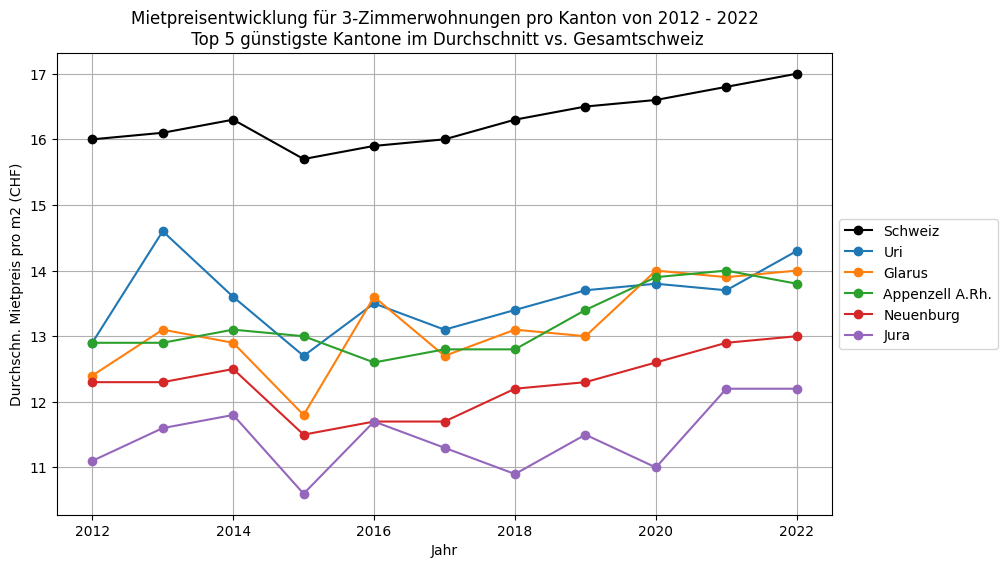

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten als DataFrame einlesen
data = {
"Kanton": ["Schweiz","Zürich","Bern","Luzern","Uri","Schwyz","Obwalden","Nidwalden","Glarus","Zug","Freiburg","Solothurn","Basel-Stadt","Basel-Landschaft","Schaffhausen","Appenzell A.Rh.","Appenzell I.Rh.","St.Gallen","Graubünden","Aargau","Thurgau","Tessin","Waadt","Wallis","Neuenburg","Genf","Jura"],
2022: [17 , 20 , 15.4 , 16.3 , 14.3 , 17.4 , 14.5 , 16.5 , 14 , 20 , 15.2 , 14 , 18.2 , 17.4 , 13.9 , 13.8 , 15.9 , 15.1 , 15.8 , 15.9 , 14.6 , 14.2 , 18.1 , 14.5 , 13 , 20.3 , 12.2],
2021: [16.8 , 19.7 , 15.3 , 16.1 , 13.7 , 17.4 , 15 , 16.2 , 13.9 , 19.7 , 15.2 , 14 , 18 , 17.3 , 14.4 , 14 , 15.2 , 14.9 , 15.7 , 15.8 , 14.4 , 14.1 , 18 , 14 , 12.9 , 19.7 , 12.2],
2020: [16.6 , 19.2 , 15.2 , 15.9 , 13.8 , 16.7 , 14.5 , 16.8 , 14 , 19.3 , 14.8 , 14 , 17.7 , 17.2 , 13.7 , 13.9 , 14 , 14.7 , 15.4 , 15.7 , 14.2 , 14.1 , 17.7 , 14.2 , 12.6 , 19.7 , 11],
2019: [16.5 , 19.3 , 15.1 , 15.9 , 13.7 , 17 , 14.3 , 16.5 , 13 , 20.1 , 14.5 , 13.9 , 17.7 , 17 , 13.4 , 13.4 , 15.7 , 14.5 ,15.8 , 15.5 , 14 , 13.7 , 17.4 , 14 , 12.3 , 19.5 , 11.5],
2018: [16.3 , 19.1 , 14.8 , 15.6 , 13.4 , 16.5 , 14.2 , 15.7 , 13.1 , 19.8 , 14.7 , 13.3 , 17.4 , 16.9 , 13.5 , 12.8 , 14.4 , 14.5 , 15.6 , 15.6 , 13.7 , 13.7 , 17.1 , 14 , 12.2 , 18.9 , 10.9],
2017: [16.0 , 18.7 , 14.5 , 15.4 , 13.1 , 16.3 , 14.0 , 16.7 , 12.7 , 19.5 , 14.8 , 13.6 , 16.8 , 16.7 , 13.5 , 12.8 ,  15.0  , 14.4 , 15.3 , 15.1 , 13.9 , 13.5 , 17.1 , 13.9 , 11.7 , 18.5 , 11.3],
2016: [15.9 , 18.6 , 14.5 , 15.4 , 13.5 , 16.7 , 13.2 , 15.3 , 13.6 , 20.2 , 14.5 , 13.3 , 16.9 , 16.3 , 13.4 , 12.6 ,  13.2  , 14.0 , 15.3 , 15.1 , 13.6 , 13.4 , 16.6 , 13.5 , 11.7 , 18.4 , 11.7],
2015: [15.7 , 18.3 , 14.3 , 15.2 , 12.7 , 16.6 , 13.0 , 15.3 , 11.8 , 19.5 , 14.2 , 13.4 , 16.4 , 16.3 , 13.1 , 13.0 ,  12.9  , 14.0 , 15.2 , 15.0 , 13.3 , 13.3 , 16.3 , 13.3 , 11.5 , 18.1 , 10.6],
2014: [16.3 , 18.8 , 15.0 , 15.6 , 13.6 , 17.4 , 14.6 , 16.8 , 12.9 , 19.9 , 15.2 , 14.0 , 16.8 , 17.0 , 14.2 , 13.1 ,  14.1  , 15.0 , 15.4 , 15.5 , 13.8 , 13.9 , 17.2 , 14.3 , 12.5 , 18.7 , 11.8],
2013: [16.1 , 18.8 , 14.6 , 15.5 , 14.6 , 16.9 , 15.4 , 16.4 , 13.1 , 19.1 , 14.6 , 13.6 , 16.7 , 16.5 , 13.3 , 12.9 ,  13.7  , 14.4 , 16.1 , 15.5 , 13.5 , 13.7 , 16.6 , 13.7 , 12.3 , 18.7 , 11.6],
2012: [16.0 , 18.5 , 15.0 , 15.4 , 12.9 , 16.9 , 14.4 , 15.8 , 12.4 , 19.6 , 14.6 , 13.5 , 16.6 , 16.9 , 13.0 , 12.9 ,  13.9  , 14.2 , 16.0 , 15.2 , 13.7 , 13.4 , 16.6 , 13.6 , 12.3 , 18.5 , 11.1]
}

# Daten in DataFrame konvertieren
df = pd.DataFrame(data)

# Nur die gewünschten Kantone auswählen
selected_kantone = ["Schweiz", "Uri", "Glarus", "Appenzell A.Rh.", "Neuenburg", "Jura"]
df = df[df["Kanton"].isin(selected_kantone)]

# Kantone alphabetisch sortieren
sorted_df = df.sort_values(by="Kanton")

# Diagramm erstellen
plt.figure(figsize=(10, 6))
for i in range(len(df)):
    if df.iloc[i, 0] == "Schweiz":
        plt.plot(df.columns[1:], df.iloc[i, 1:], marker='o', color='black', label=df.iloc[i, 0])
    else:
        plt.plot(df.columns[1:], df.iloc[i, 1:], marker='o', label=df.iloc[i, 0])
plt.title('Mietpreisentwicklung für 3-Zimmerwohnungen pro Kanton von 2012 - 2022\n Top 5 günstigste Kantone im Durchschnitt vs. Gesamtschweiz')
plt.xlabel('Jahr')
plt.ylabel('Durchschn. Mietpreis pro m2 (CHF)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

**Beschreibung der Grafik und Auffälligkeiten**: Auch in dieser Grafik ist ersichtlich, dass alle Kantone bis auf Appenzell A.Rh. im Jahr einen Rückgang erfahren haben. Allgemein weisen die Kantone unterschiedliche Schwankungen auf. Neuenburg verläuft sehr ähnlich wie der Durchschnitt der Gesamtschweiz.

###2b) Korrelation der Mietpreise mit dem hypothekarischen Referenzzinssatz sowie der Teuerung

Korrelation mit hypothekarischem Referenzzinssatz

In [1]:
import pandas as pd
import numpy as np

# Daten von der URL laden
url = "https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreise_ZinsR.xlsx"
daten = pd.read_excel(url)

# Spaltennamen anpassen, falls erforderlich
spalte1_name = 'Mietpreise'
spalte2_name = 'Hypothekarischer Referenzzinssatz bei Mietverhältnissen'

# Korrelationskoeffizient berechnen
korrelation = np.corrcoef(daten[spalte1_name], daten[spalte2_name])[0, 1]

print("Korrelationskoeffizient zwischen", spalte1_name, "und", spalte2_name, "ist:", korrelation)

Korrelationskoeffizient zwischen Mietpreise und Hypothekarischer Referenzzinssatz bei Mietverhältnissen ist: -0.7490936617029155


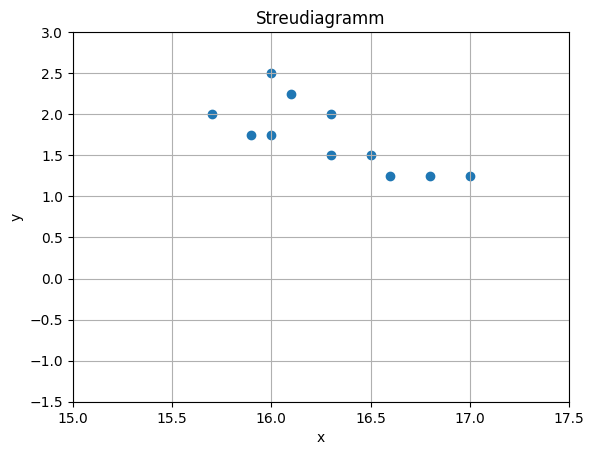

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten aus Excel-Datei laden
daten = pd.read_excel("https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreise_ZinsR.xlsx")

# Spalten auswählen
x = daten['Mietpreise']
y = daten['Hypothekarischer Referenzzinssatz bei Mietverhältnissen']

# Streudiagramm erstellen
plt.scatter(x, y)
plt.title('Streudiagramm')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(15, 17.5)
plt.ylim(-1.5, 3)
plt.grid(True)
plt.show()

Korrelation mit LIK

In [3]:
import pandas as pd
import numpy as np

# Daten von der URL laden
url = "https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/LIK_Mietpreise.xlsx"
daten = pd.read_excel(url)

# Spaltennamen anpassen, falls erforderlich
spalte1_name = 'Mietpreise'
spalte2_name = 'LIK national'

# Korrelationskoeffizient berechnen
korrelation = np.corrcoef(daten[spalte1_name], daten[spalte2_name])[0, 1]

print("Korrelationskoeffizient zwischen", spalte1_name, "und", spalte2_name, "ist:", korrelation)

Korrelationskoeffizient zwischen Mietpreise und LIK national ist: 0.7162983353305304


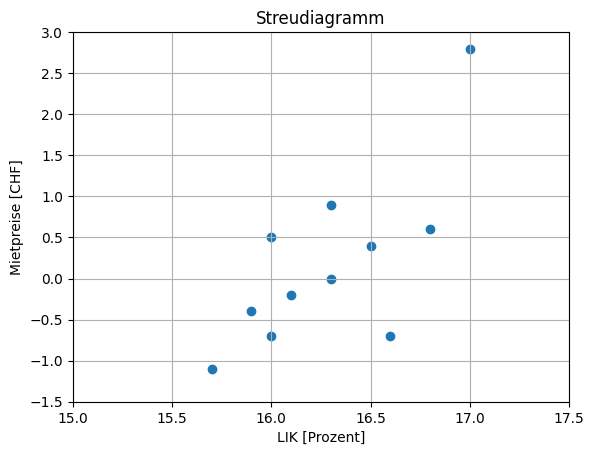

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten aus Excel-Datei laden
daten = pd.read_excel("https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/LIK_Mietpreise.xlsx")

# Spalten auswählen
x = daten['Mietpreise']
y = daten['LIK national']

# Streudiagramm erstellen
plt.scatter(x, y)
plt.title('Streudiagramm')
plt.xlabel('LIK [Prozent]')
plt.ylabel('Mietpreise [CHF]')
plt.xlim(15, 17.5)
plt.ylim(-1.5, 3)
plt.grid(True)
plt.show()

###2c) Entwicklung der leerstehenden Wohnungen (1995-2023)

####Leerstehende Wohnungen Schweiz nach Jahr (absolute Werte)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Leerstehende_Wohnungen_Kantone.csv', header=None)

dataLeerstehend=df

# zweite Zeile als neue Spaltenüberschriften verwenden
new_columns = dataLeerstehend.iloc[2]
dataLeerstehend.columns = new_columns

# ersten beiden Zeilen entfernen
dataLeerstehend = dataLeerstehend.drop([0, 1, 2])

dataLeerstehend.columns = dataLeerstehend.columns[:2].tolist() + dataLeerstehend.columns[2:].astype(int).tolist()



dataLeerstehend.head()


,Gemeindenummer,Ort,1995,1996,1997,1998,1999,2000,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
3,AG,Kanton Aargau,3237.0,3870.0,4950.0,5511.0,5164.0,5063.0,4417.0,3378.0,...,4957.0,5975.0,6687.0,7323.0,8437.0,8377.0,8733.0,7009.0,5696.0,4778.0
4,AI,Kanton Appenzell I.Rh.,68.0,121.0,110.0,117.0,107.0,135.0,119.0,104.0,...,82.0,63.0,282.0,186.0,150.0,163.0,174.0,215.0,139.0,134.0
5,AR,Kanton Appenzell A.Rh.,154.0,273.0,270.0,321.0,402.0,481.0,513.0,489.0,...,502.0,549.0,562.0,577.0,628.0,669.0,482.0,605.0,549.0,359.0
6,BE,Kanton Bern,4250.0,5360.0,6419.0,7012.0,6800.0,6702.0,6388.0,5335.0,...,7761.0,8012.0,9309.0,10262.0,10317.0,10641.0,10678.0,9312.0,8633.0,7817.0
7,BL,Kanton Basel-Landschaft,451.0,502.0,632.0,644.0,668.0,687.0,679.0,498.0,...,427.0,528.0,645.0,809.0,1060.0,1492.0,1617.0,1404.0,1353.0,1359.0


In [ ]:
# Spalte Gemeindenummer entfernen
dataLeerstehend = dataLeerstehend.drop(['Gemeindenummer'], axis = 1)
dataLeerstehend.head()

,Ort,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
3,Kanton Aargau,3237.0,3870.0,4950.0,5511.0,5164.0,5063.0,4417.0,3378.0,2844.0,...,4957.0,5975.0,6687.0,7323.0,8437.0,8377.0,8733.0,7009.0,5696.0,4778.0
4,Kanton Appenzell I.Rh.,68.0,121.0,110.0,117.0,107.0,135.0,119.0,104.0,86.0,...,82.0,63.0,282.0,186.0,150.0,163.0,174.0,215.0,139.0,134.0
5,Kanton Appenzell A.Rh.,154.0,273.0,270.0,321.0,402.0,481.0,513.0,489.0,513.0,...,502.0,549.0,562.0,577.0,628.0,669.0,482.0,605.0,549.0,359.0
6,Kanton Bern,4250.0,5360.0,6419.0,7012.0,6800.0,6702.0,6388.0,5335.0,5116.0,...,7761.0,8012.0,9309.0,10262.0,10317.0,10641.0,10678.0,9312.0,8633.0,7817.0
7,Kanton Basel-Landschaft,451.0,502.0,632.0,644.0,668.0,687.0,679.0,498.0,506.0,...,427.0,528.0,645.0,809.0,1060.0,1492.0,1617.0,1404.0,1353.0,1359.0


In [ ]:
#Anzahl der Werte anzeigen
dataLeerstehend.count()

Ort     26
1995    26
1996    26
1997    26
1998    26
1999    26
2000    26
2001    26
2002    26
2003    26
2004    26
2005    26
2006    26
2007    26
2008    26
2009    26
2010    26
2011    26
2012    26
2013    26
2014    26
2015    26
2016    26
2017    26
2018    26
2019    26
2020    26
2021    26
2022    26
2023    26
dtype: int64

Text(0.5, 1.0, 'Boxplot Anzahl Leerstehende Wohnungen (1995 bis 2023)')

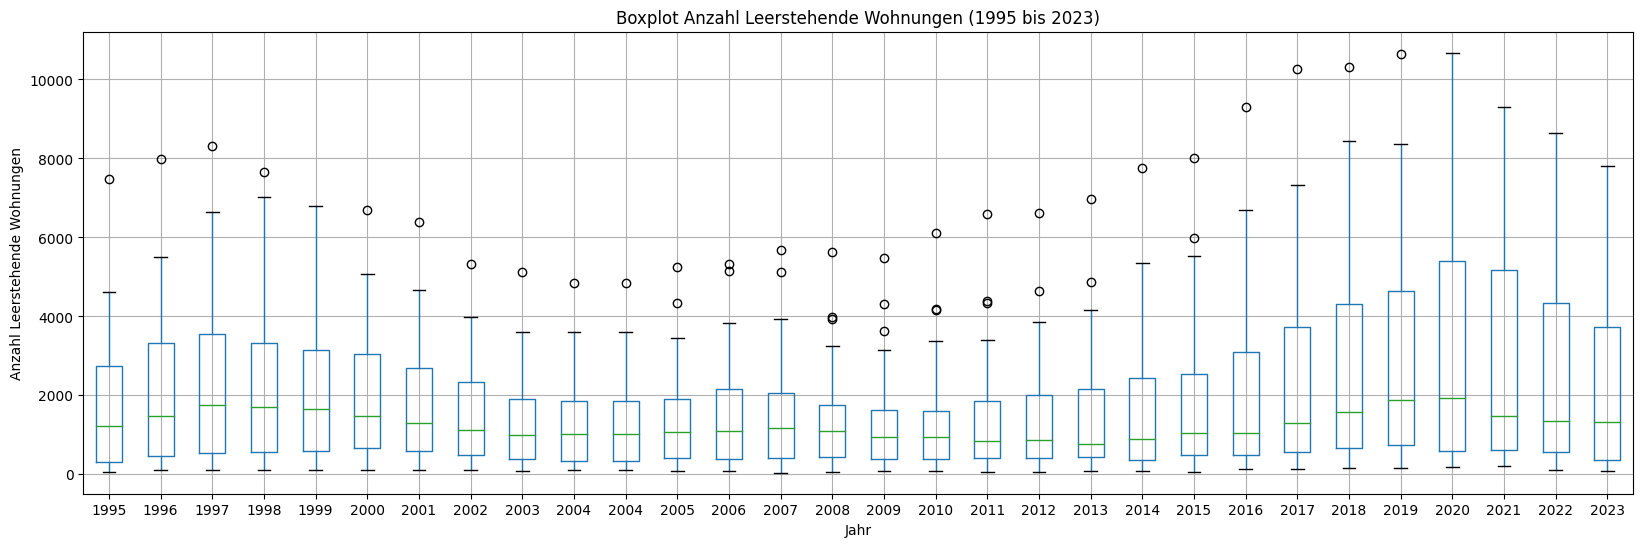

In [ ]:
#Boxplit nach Jahr erstellen mit mathplotlib
dataLeerstehend.boxplot(column=[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], figsize=(20, 6))


plt.xlabel('Jahr')
plt.ylabel('Anzahl Leerstehende Wohnungen')
plt.title('Boxplot Anzahl Leerstehende Wohnungen (1995 bis 2023)')

####Leerwohnungsziffer nach Jahr und Kanton (prozentualer Anteil an Gesamtanzahl Wohnungen)

Unter der Leerwohnungsziffer versteht man den prozentualen Anteil der leer stehenden Wohnungen am Gesamtwohnungsbestand der registerbasierten Gebäude- und Wohnungsstatistik des Vorjahres.

#####Leerwohnungsziffer nach Jahre

In [ ]:
#Datenimport

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Leerwohnungsziffer_Kantone.csv', header=0)

Leerwohnungsziffer=df

Leerwohnungsziffer.head()


,Kanton,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Kanton Aargau,...,...,2.17,2.38,2.20,2.13,1.83,1.39,1.16,...,1.67,1.98,2.18,2.34,2.65,2.59,2.65,2.10,1.69,1.40
1,Kanton Appenzell I.Rh.,...,...,1.81,1.91,1.74,2.17,1.90,1.65,1.39,...,1.12,0.83,3.63,2.36,1.89,2.02,2.15,2.59,1.67,1.59
2,Kanton Appenzell A.Rh.,...,...,1.10,1.30,1.62,1.92,2.04,1.94,2.03,...,1.81,1.96,1.99,2.02,2.18,2.30,1.64,2.05,1.84,1.20
3,Kanton Bern,...,...,1.40,1.51,1.46,1.42,1.35,1.12,1.08,...,1.44,1.47,1.69,1.84,1.83,1.87,1.86,1.61,1.48,1.33
4,Kanton Basel-Landschaft,...,...,0.57,0.57,0.58,0.59,0.57,0.42,0.42,...,0.32,0.39,0.47,0.58,0.76,1.06,1.14,0.97,0.93,0.92


Text(0.5, 1.0, 'Boxplot Leerhwohnungsziffer (1995 bis 2023)')

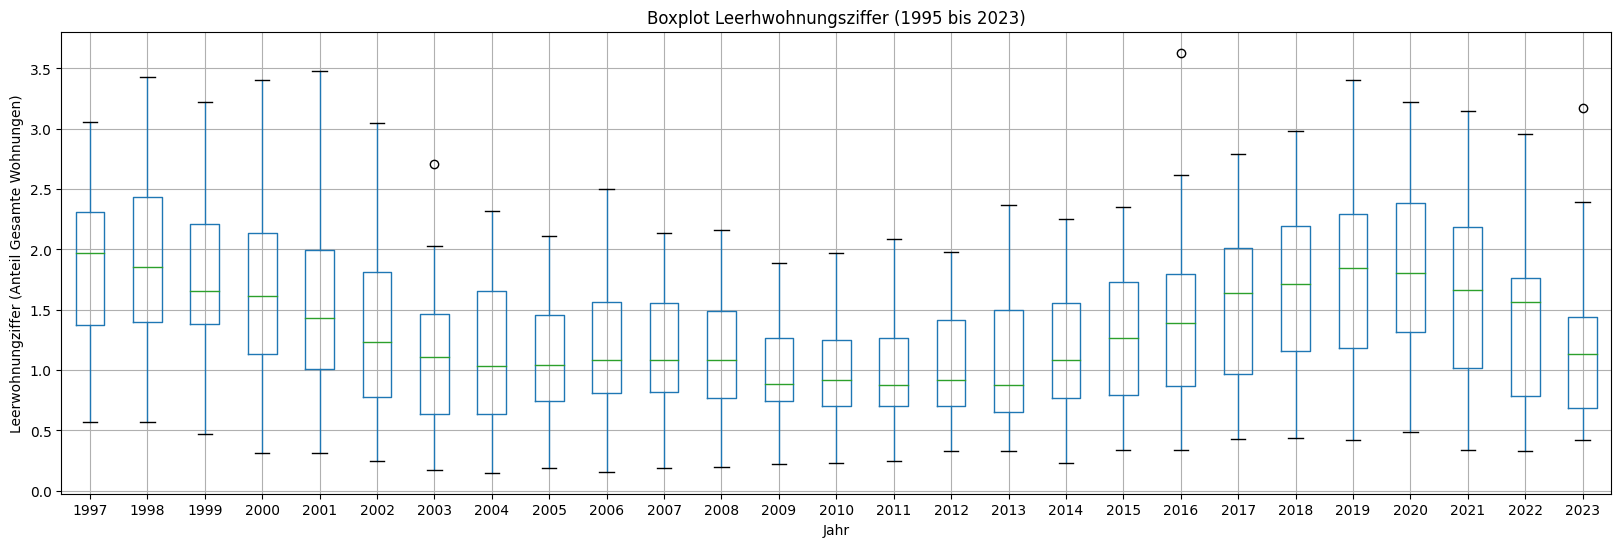

In [ ]:
#Boxplot erstellen mit Mathplotlib

Leerwohnungsziffer.boxplot(figsize=(20, 6))


plt.xlabel('Jahr')
plt.ylabel('Leerwohnungziffer (Anteil Gesamte Wohnungen)')
plt.title('Boxplot Leerhwohnungsziffer (1995 bis 2023)')


**Beschreibung der Grafik und Auffälligkeiten:** Die Grafik zeigt die Leerwohnungsziffer der gesamten Schweiz im Zeitraum von 1997 bis 2023 in Form eines Box-Plot. Der Median der leerstehenden Wohnungen in der Schweiz ist von 1997 bis 2004 gesunken. Ab 2014 stieg die Leerwohnungsziffer wieder an.

#####Leerwohnungsziffer nach Kantone

In [ ]:
#Transponieren der Tabelle (Kantone zu Spalten, da Boxplot für Spalten ausgelegt) und speicher eines neuen CSVs
Leerwohnungsziffer_Kanton = Leerwohnungsziffer.T

Leerwohnungsziffer_Kanton.to_csv('Leerwohnugsziffer_Kantone.csv', index=False)

In [ ]:
# Neues df aus CSV Datei erstellen

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Leerwohnugsziffer_Kantone_Spalten.csv', header=0)


Leerwohnungsziffer_Kanton=df


Leerwohnungsziffer_Kanton.head()

,Kanton Aargau,Kanton Appenzell I.Rh.,Kanton Appenzell A.Rh.,Kanton Bern,Kanton Basel-Landschaft,Kanton Basel-Stadt,Kanton Freiburg,Kanton Genf,Kanton Glarus,Kanton GraubÃ¼nden,...,Kanton Schaffhausen,Kanton Solothurn,Kanton Schwyz,Kanton Thurgau,Kanton Tessin,Kanton Uri,Kanton Waadt,Kanton Wallis,Kanton Zug,Kanton ZÃ¼rich
0,2.17,1.81,1.10,1.40,0.57,1.20,2.30,1.58,2.69,1.40,...,2.60,3.06,2.23,2.90,2.03,1.91,2.68,2.64,0.92,1.17
1,2.38,1.91,1.30,1.51,0.57,1.52,2.21,1.61,2.83,1.36,...,2.57,3.00,1.96,3.43,1.74,1.77,2.45,2.46,0.92,1.15
2,2.20,1.74,1.62,1.46,0.58,1.54,2.20,1.36,2.97,1.32,...,2.62,2.76,1.69,3.22,1.32,1.72,1.81,2.31,0.47,0.97
3,2.13,2.17,1.92,1.42,0.59,1.31,1.82,0.86,3.40,1.11,...,3.19,2.77,1.41,3.00,1.22,1.77,1.38,2.05,0.31,0.71
4,1.83,1.90,2.04,1.35,0.57,1.41,1.78,0.39,3.48,1.06,...,3.24,2.28,1.03,2.76,1.12,1.49,1.00,1.50,0.31,0.47


In [ ]:
#Daten der Grösse nach sortieren:

# neue Zeile Mittelwert einfügen
Leerwohnungsziffer_Kanton.loc['Mittelwert'] = Leerwohnungsziffer_Kanton.mean()

# Spalten nach dem Mittelwert sortieren und neues df generieren
Leerwohnungsziffer_Kanton = Leerwohnungsziffer_Kanton.sort_values(by='Mittelwert', axis=1)

Leerwohnungsziffer_Kanton.head()


,Kanton Zug,Kanton Genf,Kanton Basel-Landschaft,Kanton ZÃ¼rich,Kanton Obwalden,Kanton Waadt,Kanton Basel-Stadt,Kanton Schwyz,Kanton Luzern,Kanton GraubÃ¼nden,...,Kanton Appenzell I.Rh.,Kanton Wallis,Kanton Appenzell A.Rh.,Kanton Schaffhausen,Kanton Aargau,Kanton St. Gallen,Kanton Thurgau,Kanton Glarus,Kanton Jura,Kanton Solothurn
0,0.92,1.58,0.57,1.17,1.37,2.68,1.20,2.23,1.65,1.40,...,1.81,2.64,1.10,2.60,2.17,2.04,2.90,2.69,2.31,3.06
1,0.92,1.61,0.57,1.15,1.31,2.45,1.52,1.96,1.80,1.36,...,1.91,2.46,1.30,2.57,2.38,2.53,3.43,2.83,2.07,3.00
2,0.47,1.36,0.58,0.97,1.45,1.81,1.54,1.69,1.57,1.32,...,1.74,2.31,1.62,2.62,2.20,2.48,3.22,2.97,2.21,2.76
3,0.31,0.86,0.59,0.71,0.96,1.38,1.31,1.41,1.46,1.11,...,2.17,2.05,1.92,3.19,2.13,2.44,3.00,3.40,2.14,2.77
4,0.31,0.39,0.57,0.47,0.79,1.00,1.41,1.03,1.27,1.06,...,1.90,1.50,2.04,3.24,1.83,2.26,2.76,3.48,2.03,2.28


In [ ]:
#  "Mittelwert"-Zeile entfernen, damit sie nicht im Boxplot erscheint

Leerwohnungsziffer_Kanton = Leerwohnungsziffer_Kanton.drop('Mittelwert')

Leerwohnungsziffer_Kanton.head()

,Kanton Zug,Kanton Genf,Kanton Basel-Landschaft,Kanton ZÃ¼rich,Kanton Obwalden,Kanton Waadt,Kanton Basel-Stadt,Kanton Schwyz,Kanton Luzern,Kanton GraubÃ¼nden,...,Kanton Appenzell I.Rh.,Kanton Wallis,Kanton Appenzell A.Rh.,Kanton Schaffhausen,Kanton Aargau,Kanton St. Gallen,Kanton Thurgau,Kanton Glarus,Kanton Jura,Kanton Solothurn
0,0.92,1.58,0.57,1.17,1.37,2.68,1.20,2.23,1.65,1.40,...,1.81,2.64,1.10,2.60,2.17,2.04,2.90,2.69,2.31,3.06
1,0.92,1.61,0.57,1.15,1.31,2.45,1.52,1.96,1.80,1.36,...,1.91,2.46,1.30,2.57,2.38,2.53,3.43,2.83,2.07,3.00
2,0.47,1.36,0.58,0.97,1.45,1.81,1.54,1.69,1.57,1.32,...,1.74,2.31,1.62,2.62,2.20,2.48,3.22,2.97,2.21,2.76
3,0.31,0.86,0.59,0.71,0.96,1.38,1.31,1.41,1.46,1.11,...,2.17,2.05,1.92,3.19,2.13,2.44,3.00,3.40,2.14,2.77
4,0.31,0.39,0.57,0.47,0.79,1.00,1.41,1.03,1.27,1.06,...,1.90,1.50,2.04,3.24,1.83,2.26,2.76,3.48,2.03,2.28


Text(0.5, 1.0, 'Boxplot Leerwohnungsziffer nach Kanton (1997 bis 2023)')

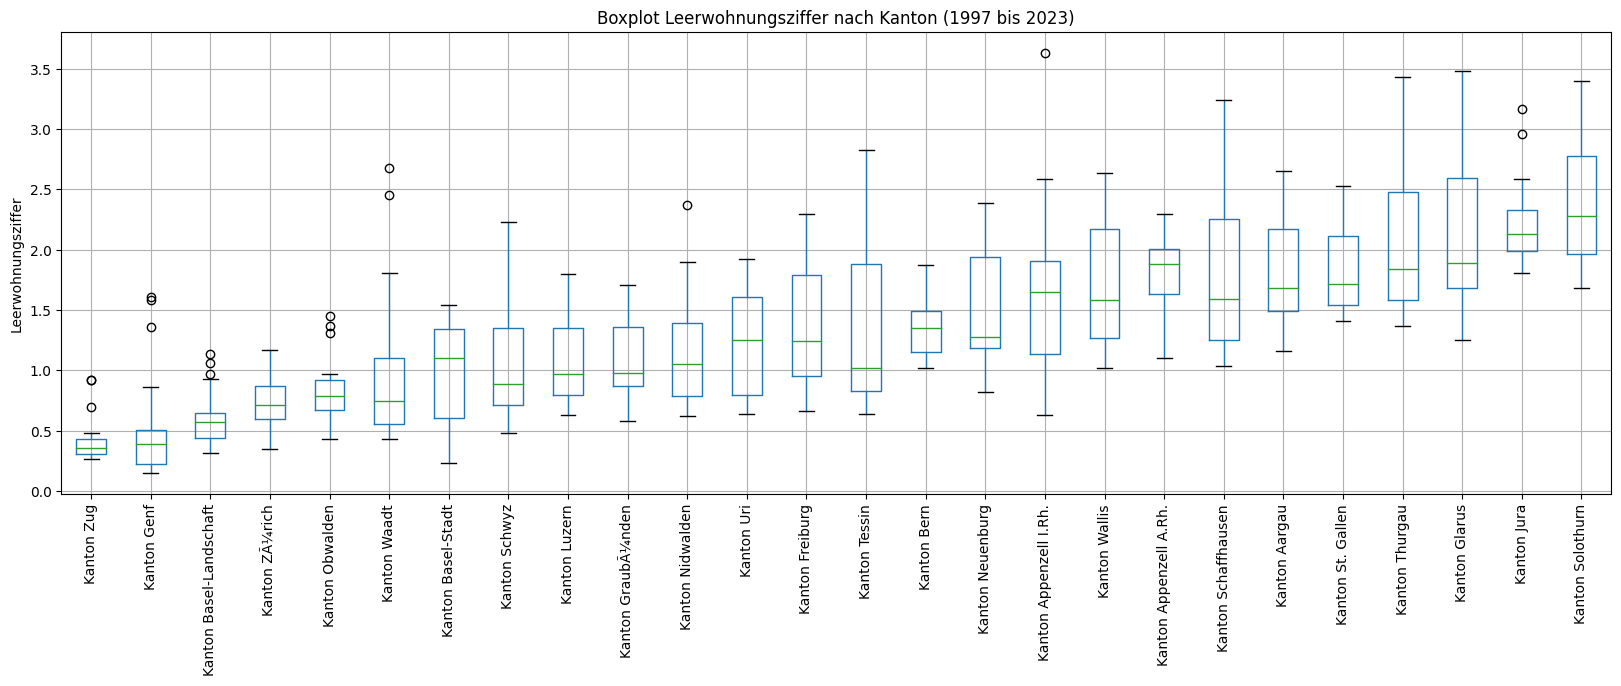

In [ ]:
#Boxplot erstellen und vertikale Beschriftung einfügen
Leerwohnungsziffer_Kanton.boxplot(figsize=(20, 6))

plt.xticks(rotation='vertical')

plt.ylabel('Leerwohnungsziffer')
plt.title('Boxplot Leerwohnungsziffer nach Kanton (1997 bis 2023)')

**Beschreibung der Grafik und Auffälligkeiten:** Die Grafik zeigt die Leerwohnungsziffer je Kanton im Zeitraum von 1997 bis 2023 als Box-Plot. Betrachtet man den Median, hatte der Kanton Zug  in den letzten zwanzig Jahren die tiefste, der Kanton Solothurn die höchste Anzahl an leerstehenden Wohnungen.

In [ ]:
#Boxplot als interaktive Grafik (mit Plotly Bibliothek)

!pip install plotly

import plotly.express as px
import pandas as pd


# Erstelle den Boxplot mit Plotly
fig = px.box(Leerwohnungsziffer_Kanton)

# Achsenbeschriftungen hinzufügen
fig.update_layout(
    xaxis_title='Kanton',
    yaxis_title='Leerwohnungsziffer')

# Zeige den Boxplot an
fig.show()


###2d) Korrelation der Mietpreise mit den Leerstände

Verglichen werden die Mietpreise und die Leerwohnungsziffern je Kanton

####Korrelation Entwicklung Mietpreis/m2 und Leerwohnungsziffer

*Import der Daten zum Mietpreis pro m2*

In [ ]:
#Importieren der Excel-Datei
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Mietpreise_raw = pd.read_excel("https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx", header=0)

#Zeile "Zinssatz" entfernen
Mietpreise_raw = Mietpreise_raw.drop(27)

Mietpreise_raw.head()

,Kanton,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
0,Aargau,15.9,15.8,15.7,15.5,15.6,15.1,15.1,15.0,15.5,15.5,15.2
1,Appenzell A.Rh.,13.8,14.0,13.9,13.4,12.8,12.8,12.6,13.0,13.1,12.9,12.9
2,Appenzell I.Rh.,15.9,15.2,14.0,15.7,14.4,15.0,13.2,12.9,14.1,13.7,13.9
3,Basel-Landschaft,17.4,17.3,17.2,17.0,16.9,16.7,16.3,16.3,17.0,16.5,16.9
4,Basel-Stadt,18.2,18.0,17.7,17.7,17.4,16.8,16.9,16.4,16.8,16.7,16.6


In [ ]:
print(Mietpreise_raw)

              Kanton  2022  2021  2020  2019  2018  2017  2016  2015  2014  \
0             Aargau  15.9  15.8  15.7  15.5  15.6  15.1  15.1  15.0  15.5   
1    Appenzell A.Rh.  13.8  14.0  13.9  13.4  12.8  12.8  12.6  13.0  13.1   
2    Appenzell I.Rh.  15.9  15.2  14.0  15.7  14.4  15.0  13.2  12.9  14.1   
3   Basel-Landschaft  17.4  17.3  17.2  17.0  16.9  16.7  16.3  16.3  17.0   
4        Basel-Stadt  18.2  18.0  17.7  17.7  17.4  16.8  16.9  16.4  16.8   
5               Bern  18.2  18.0  17.7  17.7  17.4  16.8  16.9  16.4  16.8   
6           Freiburg  15.2  15.2  14.8  14.5  14.7  14.8  14.5  14.2  15.2   
7               Genf  20.3  19.7  19.7  19.5  18.9  18.5  18.4  18.1  18.7   
8             Glarus  14.0  13.9  14.0  13.0  13.1  12.7  13.6  11.8  12.9   
9         Graubünden  15.8  15.7  15.4  15.8  15.6  15.3  15.3  15.2  15.4   
10              Jura  12.2  12.2  11.0  11.5  10.9  11.3  11.7  10.6  11.8   
11            Luzern  16.3  16.1  15.9  15.9  15.6  15.4  15.4  

In [ ]:
#Matrix in Liste umwandeln
Mietpreise_list= Mietpreise_raw.melt(id_vars=['Kanton'], var_name='Jahr', value_name='Mietpreis pro m2')


Mietpreise_list.head()


,Kanton,Jahr,Mietpreis pro m2
0,Aargau,2022,15.9
1,Appenzell A.Rh.,2022,13.8
2,Appenzell I.Rh.,2022,15.9
3,Basel-Landschaft,2022,17.4
4,Basel-Stadt,2022,18.2


*Import der Daten zur Leerwohnungsziffer*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Leerwohnungsziffer_Kantone.csv', header=0)

Leerwohnungsziffer=df

Leerwohnungsziffer.head()


,Kanton,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Kanton Aargau,...,...,2.17,2.38,2.20,2.13,1.83,1.39,1.16,...,1.67,1.98,2.18,2.34,2.65,2.59,2.65,2.10,1.69,1.40
1,Kanton Appenzell I.Rh.,...,...,1.81,1.91,1.74,2.17,1.90,1.65,1.39,...,1.12,0.83,3.63,2.36,1.89,2.02,2.15,2.59,1.67,1.59
2,Kanton Appenzell A.Rh.,...,...,1.10,1.30,1.62,1.92,2.04,1.94,2.03,...,1.81,1.96,1.99,2.02,2.18,2.30,1.64,2.05,1.84,1.20
3,Kanton Bern,...,...,1.40,1.51,1.46,1.42,1.35,1.12,1.08,...,1.44,1.47,1.69,1.84,1.83,1.87,1.86,1.61,1.48,1.33
4,Kanton Basel-Landschaft,...,...,0.57,0.57,0.58,0.59,0.57,0.42,0.42,...,0.32,0.39,0.47,0.58,0.76,1.06,1.14,0.97,0.93,0.92


In [ ]:
#Werte ausserhalb von Zeiraum 2012 bis 2022 entfernen
columns_to_drop = Leerwohnungsziffer.columns[1:18].tolist() + [Leerwohnungsziffer.columns[29]]
Leerwohnungsziffer_bearb = Leerwohnungsziffer.drop(columns_to_drop, axis=1)

Leerwohnungsziffer_bearb.head()


,Kanton,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Kanton Aargau,1.61,1.68,1.67,1.98,2.18,2.34,2.65,2.59,2.65,2.10,1.69
1,Kanton Appenzell I.Rh.,0.86,1.21,1.12,0.83,3.63,2.36,1.89,2.02,2.15,2.59,1.67
2,Kanton Appenzell A.Rh.,1.67,1.68,1.81,1.96,1.99,2.02,2.18,2.30,1.64,2.05,1.84
3,Kanton Bern,1.25,1.31,1.44,1.47,1.69,1.84,1.83,1.87,1.86,1.61,1.48
4,Kanton Basel-Landschaft,0.44,0.37,0.32,0.39,0.47,0.58,0.76,1.06,1.14,0.97,0.93


In [ ]:
#Matrix in eine Liste umwandeln und Wert umbenennen zu Leerwohnungsziffer
Leerwohnungziffer_merge = Leerwohnungsziffer_bearb.melt(id_vars=['Kanton'], var_name='Jahr', value_name='Wert')
Leerwohnungziffer_merge['Kanton'] = Leerwohnungziffer_merge['Kanton'].str.replace('Kanton ', '', regex=False)

Leerwohnungziffer_merge = Leerwohnungziffer_merge.rename(columns={'Wert': 'Leerwohnungsziffer'})

Leerwohnungziffer_merge.head()

,Kanton,Jahr,Leerwohnungsziffer
0,Aargau,2012,1.61
1,Appenzell I.Rh.,2012,0.86
2,Appenzell A.Rh.,2012,1.67
3,Bern,2012,1.25
4,Basel-Landschaft,2012,0.44


In [ ]:
#Leerzeichen vor Spaltenüberschrift "Kanton" entfernen und

Mietpreise_merge = Mietpreise_merge.rename(columns={' Kanton': 'Kanton'})


print("Spaltennamen in df1:", Leerwohnungziffer_merge.columns)
print("Spaltennamen in df2:", Mietpreise_merge.columns)

Spaltennamen in df1: Index(['Kanton', 'Jahr', 'Leerwohnungsziffer'], dtype='object')
Spaltennamen in df2: Index(['Kanton', 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013], dtype='object')


In [ ]:
# Datentyp von "Jahr" auf Int setzen

Leerwohnungziffer_merge['Jahr'] = Leerwohnungziffer_merge['Jahr'].astype(int)
Mietpreise_list['Jahr'] = Mietpreise_list['Jahr'].astype(int)


print("Datentyp der Spalte 'Jahr' in df1:", Leerwohnungziffer_merge['Jahr'].dtype)
print("Datentyp der Spalte 'Jahr' in df2:", Mietpreise_list['Jahr'].dtype)

Datentyp der Spalte 'Jahr' in df1: int64
Datentyp der Spalte 'Jahr' in df2: int64


In [ ]:
#Mergen der df's
merged_df = pd.merge(Leerwohnungziffer_merge, Mietpreise_list, on=['Kanton', 'Jahr'], how='outer')

# Reihenfolge der Spalten anpassen
merged_df = merged_df[['Jahr', 'Kanton', 'Leerwohnungsziffer', 'Mietpreis pro m2']]

merged_df.head()

,Jahr,Kanton,Leerwohnungsziffer,Mietpreis pro m2
0,2012,Aargau,1.61,15.2
1,2012,Appenzell I.Rh.,0.86,13.9
2,2012,Appenzell A.Rh.,1.67,12.9
3,2012,Bern,1.25,16.6
4,2012,Basel-Landschaft,0.44,16.9


In [ ]:
print(merged_df.dtypes)

Jahr                   object
Kanton                 object
Leerwohnungsziffer    float64
Mietpreis pro m2      float64
dtype: object


<Axes: xlabel='Mietpreis pro m2', ylabel='Leerwohnungsziffer'>

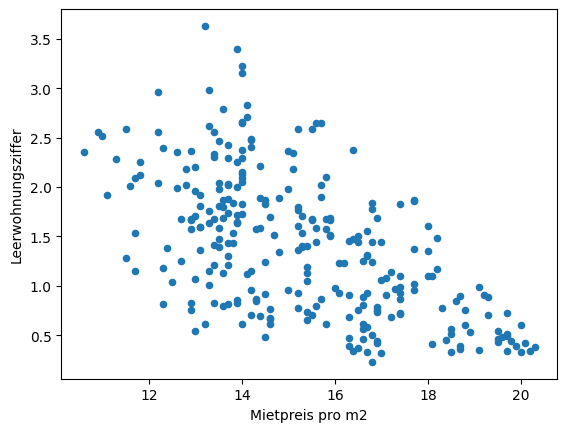

In [ ]:
#Scatterplot erstellen mit Mathplotlib


merged_df.plot(kind="scatter",x="Mietpreis pro m2",y="Leerwohnungsziffer")

In [ ]:
#Scatterplot erstellen mit Seaborne

import seaborn as sns
import plotly.express as px
import pandas as pd


# Interaktiven Scatterplot mit plotly erstellen
fig = px.scatter(merged_df, x='Mietpreis pro m2', y='Leerwohnungsziffer', color='Jahr', title='Scatterplot Mietpreis, Leerwohnungsziffer 2010 bis 2022')



fig.show()


In [ ]:
#Auswertung für einzelnes Jahr 2012
import seaborn as sns
import plotly.express as px
import pandas as pd

fig = px.scatter(
    data_frame=merged_df[merged_df['Jahr'] == 2012],  # Filter für das Jahr 2022
    x='Mietpreis pro m2',
    y='Leerwohnungsziffer',
    title='Scatterplot Mietpreis, Leerwohnungsziffer 2012'
)

fig.show()


---

##3) Diskussion und Ausblick

###Fazit

###Reflexion

###Ausblick

Notizen Antonia: Weitere Analyse:
- Wieso Zug anders schwankt als die anderen teuren Kantone
- Was war 2015?